In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Read the file
rawfile = pd.read_csv("bizCase/Business_case_data.csv")
file = rawfile.copy()

In [3]:
# get the shape
file.shape

(627323, 53)

In [4]:
# show an overview of the data
file.head()

,frame,timestamp,confidence,gaze_angle_x,gaze_angle_y,pose_Tx,pose_Ty,pose_Tz,pose_Rx,pose_Ry,...,AU26_c,AU28_c,AU45_c,Proba_hands_1_binned,Proba_hands_2_binned,DistanceHands_1_adjusted,DistanceHands_2_adjusted,question_id,candidate_id,label
0,1,0.000,0.75,-0.108,0.050,12.6,-7.8,373.5,-0.023,0.180,...,1,1,1,0,0,NaN,NaN,170431,352235,0.0
1,2,0.034,0.75,-0.102,0.044,12.4,-7.7,372.9,-0.031,0.171,...,0,1,1,0,0,NaN,NaN,170431,352235,0.0
2,3,0.067,0.75,-0.108,0.045,12.4,-7.9,373.1,-0.030,0.180,...,0,1,1,0,0,NaN,NaN,170431,352235,0.0
3,4,0.101,0.75,-0.119,0.063,12.4,-8.1,372.6,-0.010,0.196,...,1,1,1,0,0,NaN,NaN,170431,352235,0.0
4,5,0.134,0.75,-0.128,0.073,13.0,-9.0,379.6,0.005,0.210,...,1,1,1,0,0,NaN,NaN,170431,352235,0.0


In [5]:
# get the number of candidates
nbCand = file['candidate_id'].nunique()
print "number of candidates in the dataset: ",nbCand

number of candidates in the dataset:  219


In [6]:
# Replace the IDs with easier ones ranging from 1 to nbCand
file['easyID'] = file.candidate_id.astype('category').cat.rename_categories(range(1, file.candidate_id.nunique()+1))

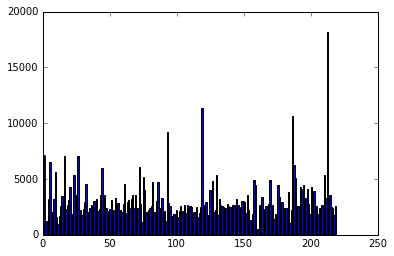

In [7]:
# Distribution in the number of frames per candidate
plt.hist(file['easyID'], bins=nbCand)
plt.show()

mean and std of gaze on X:  -0.030588170687189855 0.08616525414040223
mean and std of gaze on Y:  0.05932770677944217 0.14707246014924966


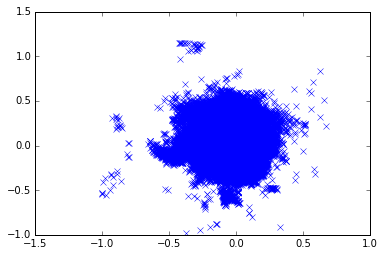

In [8]:
# Display the distribution of the gaze angle
print "mean and std of gaze on X: ", np.mean(file['gaze_angle_x']), np.std(file['gaze_angle_x'])
print "mean and std of gaze on Y: ", np.mean(file['gaze_angle_y']), np.std(file['gaze_angle_y'])
plt.plot(file['gaze_angle_x'], file['gaze_angle_y'], 'x')
plt.show()
# A good feature could be the standard deviation over the video on distance to center?

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


mean and stdev of gaze distance:  0.1440027483162352 0.09120289487074283


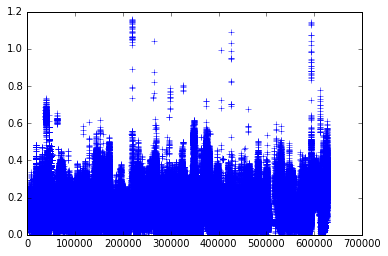

In [9]:
# Computation of the distance to center
file['gazeDist'] = np.sqrt(np.square(file['gaze_angle_x']-np.mean(file['gaze_angle_x']))+np.square(file['gaze_angle_y']-np.mean(file['gaze_angle_y'])))
print "mean and stdev of gaze distance: ",np.mean(file['gazeDist']), np.std(file['gazeDist'])
plt.plot(file['gazeDist'], '+')
plt.show()

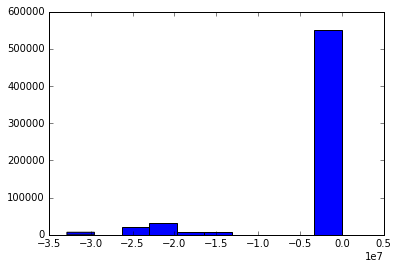

-32837992.1 285.8


In [10]:
# Remove bad data of position as first draft
plt.hist(file['pose_Tx'])
plt.show()
print np.min(file['pose_Tx']), np.max(file['pose_Tx'])
file = file[file.pose_Tx > -1000]

mean and std of face pos on X:  11.829133486998044 30.73353190550886
mean and std of face pos on Y:  1.6646002934258461 51.28213196258963
mean and std of face pos on Z:  385.21853914551053 90.23564463974283


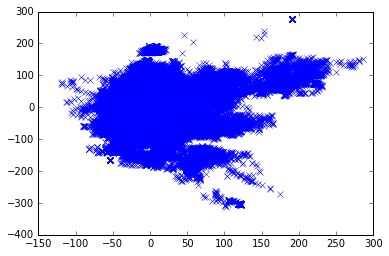

In [11]:
# Display the distribution of the face position
print "mean and std of face pos on X: ", np.mean(file['pose_Tx']), np.std(file['pose_Tx'])
print "mean and std of face pos on Y: ", np.mean(file['pose_Ty']), np.std(file['pose_Ty'])
print "mean and std of face pos on Z: ", np.mean(file['pose_Tz']), np.std(file['pose_Tz'])
plt.plot(file['pose_Tx'], file['pose_Ty'], 'x')
plt.show()
# Again, a good feature could be the standard deviation over the video on distance to center

mean and stdev of gaze distance:  91.7726013281402 58.62906740023818


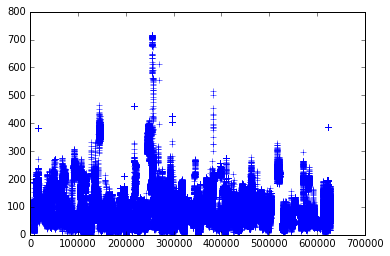

In [12]:
# Computation of the head distance to center
file['Tdist'] = np.sqrt(np.square(file['pose_Tx'])+np.square(file['pose_Ty'])+np.square(file['pose_Tz']-np.mean(file['pose_Tz'])))
print "mean and stdev of gaze distance: ",np.mean(file['Tdist']), np.std(file['Tdist'])
plt.plot(file['Tdist'], '+')
plt.show()

<IPython.core.display.Javascript object>


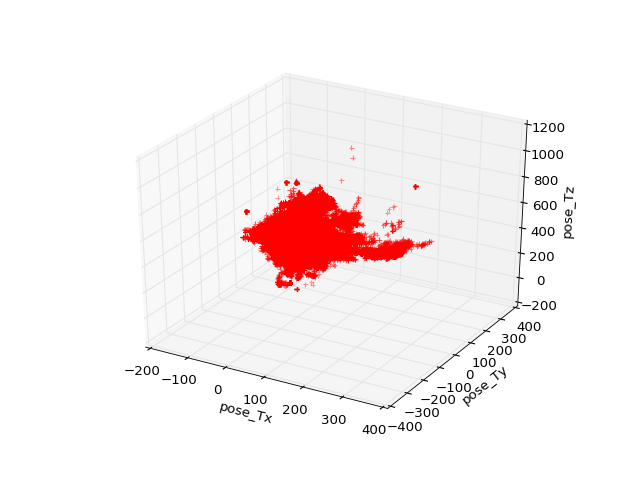

In [13]:
# See the position in 3D if it helps
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file['pose_Tx'], file['pose_Ty'], file['pose_Tz'], c='r', marker='+')
ax.set_xlabel('pose_Tx')
ax.set_ylabel('pose_Ty')
ax.set_zlabel('pose_Tz')

mean and std of face rot on X:  -0.025299194620405245 0.20118938981994047
mean and std of face rot on Y:  0.07458121530529525 0.13613543703018796
mean and std of face rot on Z:  -0.005975722547545689 0.09819786837290743


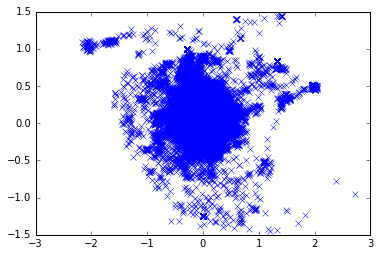

In [14]:
%matplotlib inline
# Display the distribution of the face angles
print "mean and std of face rot on X: ", np.mean(file['pose_Rx']), np.std(file['pose_Rx'])
print "mean and std of face rot on Y: ", np.mean(file['pose_Ry']), np.std(file['pose_Ry'])
print "mean and std of face rot on Z: ", np.mean(file['pose_Rz']), np.std(file['pose_Rz'])
plt.plot(file['pose_Rx'], file['pose_Ry'], 'x')
plt.show()

mean and stdev of gaze distance:  0.22174765644255415 0.16037126360903706


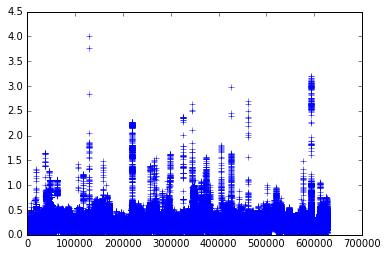

In [15]:
# Computation of the rotation distance to center
file['Rdist'] = np.sqrt(np.square(file['pose_Rx'])+np.square(file['pose_Ry'])+np.square(file['pose_Rz']))
print "mean and stdev of gaze distance: ",np.mean(file['Rdist']), np.std(file['Rdist'])
plt.plot(file['Rdist'], '+')
plt.show()

In [16]:
# Binary action units seem to be okay
AU_cfeatures = ['AU01_c','AU02_c','AU04_c','AU05_c','AU06_c','AU07_c','AU09_c','AU10_c','AU12_c','AU14_c','AU15_c','AU17_c','AU20_c','AU23_c','AU25_c','AU26_c','AU28_c','AU45_c']
file[AU_cfeatures].nunique()

AU01_c    2
AU02_c    2
AU04_c    2
AU05_c    2
AU06_c    2
AU07_c    2
AU09_c    2
AU10_c    2
AU12_c    2
AU14_c    2
AU15_c    2
AU17_c    2
AU20_c    2
AU23_c    2
AU25_c    2
AU26_c    2
AU28_c    2
AU45_c    2
dtype: int64

In [17]:
# regression AUs seem to be okay too
AU_rfeatures = ['AU01_r','AU02_r','AU04_r','AU05_r','AU06_r','AU07_r','AU09_r','AU10_r','AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r','AU45_r']
print "min values: ",file[AU_rfeatures].min()
print "max values: ",file[AU_rfeatures].max()

min values:  AU01_r    0.0
AU02_r    0.0
AU04_r    0.0
AU05_r    0.0
AU06_r    0.0
AU07_r    0.0
AU09_r    0.0
AU10_r    0.0
AU12_r    0.0
AU14_r    0.0
AU15_r    0.0
AU17_r    0.0
AU20_r    0.0
AU23_r    0.0
AU25_r    0.0
AU26_r    0.0
AU45_r    0.0
dtype: float64
max values:  AU01_r    5.00
AU02_r    5.00
AU04_r    5.00
AU05_r    5.00
AU06_r    2.96
AU07_r    4.49
AU09_r    4.29
AU10_r    5.00
AU12_r    3.39
AU14_r    5.00
AU15_r    5.00
AU17_r    5.00
AU20_r    4.24
AU23_r    1.90
AU25_r    4.52
AU26_r    4.68
AU45_r    3.64
dtype: float64


In [18]:
# Check proba hands are binned
print "this should be zeros and ones ", file['Proba_hands_1_binned'].unique()
print "this should be zeros and ones ", file['Proba_hands_2_binned'].unique()

print "this should be zeros only ", file['Proba_hands_2_binned'][file.Proba_hands_1_binned < 1].unique()

this should be zeros and ones  [0 1]
this should be zeros and ones  [0 1]
this should be zeros only  [0]


In [19]:
# Check value hand 1 is okay too
# Value should be NaN if Proba_hands_1_binned is zero
print "should return NaN all the time:", file['DistanceHands_1_adjusted'][file.Proba_hands_1_binned<1].unique()

print "should return values"
print file['DistanceHands_1_adjusted'][file.Proba_hands_1_binned>0].min()
print file['DistanceHands_1_adjusted'][file.Proba_hands_1_binned>0].max()

# might need to remove the  infinite value for the hand 1
file = file[file.DistanceHands_1_adjusted != float("inf")]

# Now values are okay
print file['DistanceHands_1_adjusted'][file.Proba_hands_1_binned>0].min()
print file['DistanceHands_1_adjusted'][file.Proba_hands_1_binned>0].max()

should return NaN all the time: [nan]
should return values
0.0209026016105419
15.1808300894745
0.0209026016105419
15.1808300894745


In [20]:
# Check value hand 2 is okay too
print "should return NaN all the time:", file['DistanceHands_2_adjusted'][file.Proba_hands_2_binned<1].unique()

print "should return values"
print file['DistanceHands_2_adjusted'][file.Proba_hands_2_binned>0].min()
print file['DistanceHands_2_adjusted'][file.Proba_hands_2_binned>0].max()

# infinite values removed with hand 1 are removed for hand 2 as well, one clean up needed only

should return NaN all the time: [nan]
should return values
0.106883799815012
8.02920812568948


In [21]:
# values of the question ID
file['question_id'].unique()
# again replacing it with easier values for understanding
file['easyQID'] = file.question_id.astype('category').cat.rename_categories(range(1, file.question_id.nunique()+1))

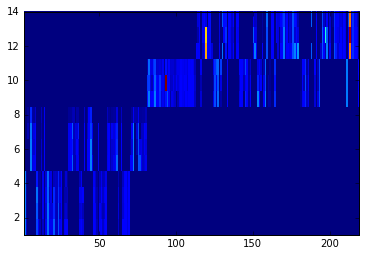

In [22]:
# Are all questions for all candidates?
plt.hist2d(file['easyID'], file['easyQID'], bins=[219,14])
plt.show()
# Clearly not, seems to be 4 populations of candidates with questions 1-4, 5-8, 9-11, 12-14

mean and stdev of the confidence:  0.9036768543588614 0.16561286901252795


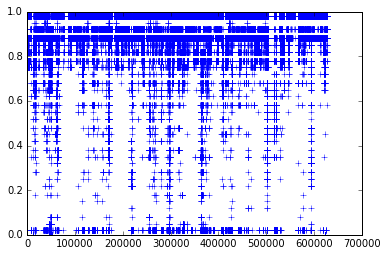

In [23]:
# confidence values
print "mean and stdev of the confidence: ", np.mean(file['confidence']), np.std(file['confidence'])
plt.plot(file['confidence'], '+')
plt.show()
#quite high mean values of 0.9 on cleaned data, but still lot of really low values
# might need a threshold in the model? 

In [24]:
# check labels are always here
file['label'].unique()
# we have an array of zeros and ones as expected

array([0., 1.])